In [1]:
%pylab inline
import sys


from scipy.signal import find_peaks

#sys.path.insert(0, '../../picwig1d/')

#from postpicwig import moviereader, tracesreader

from scipy.ndimage import gaussian_filter1d

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#!./1dpic.exe max_ell.ini 0. 25 4000 4

In [3]:
# datadir='./data/'
# griddata=tracesreader.GetGridParameters(datadir)

In [4]:
# initial_p = tracesreader.GetTracesData(datadir, griddata, 'fp_initial') 
# initial_s = tracesreader.GetTracesData(datadir, griddata, 'gm_initial') 

# plot(griddata.t/2/pi, initial_p)
# plot(griddata.t/2/pi, initial_s)

# figure()
# reflected_p = tracesreader.GetTracesData(datadir, griddata, 'fm_reflected')
# reflected_s = tracesreader.GetTracesData(datadir, griddata, 'gp_reflected')

# plot(griddata.t/2/pi, reflected_p)
# plot(griddata.t/2/pi, reflected_s)

# figure()
# passed_p = tracesreader.GetTracesData(datadir, griddata, 'fp_passed')
# passed_s = tracesreader.GetTracesData(datadir, griddata, 'gm_passed')

# plot(griddata.t/2/pi, passed_p)
# plot(griddata.t/2/pi, passed_s)

In [5]:
# plot(initial_p, initial_s)

In [6]:
# dt=griddata.t[1]-griddata.t[0]
# sp_y=fft.fft(reflected_p)
# sp_z=fft.fft(reflected_s)
# #sp_y=fft.fft(initial_p)
# #sp_z=fft.fft(initial_s)
# w=fft.fftfreq(len(reflected_p), d=dt)

In [7]:
# plt.figure(figsize=(10, 7))

# #sp_y = gaussian_filter1d(sp_y, 1)
# #sp_z = gaussian_filter1d(sp_z, 1)

# semilogy(w[:len(w)//2]*2*pi,abs(sp_y[:len(w)//2])/amax(abs(sp_y[:len(w)//2])), lw=4, color='r')
# semilogy(w[:len(w)//2]*2*pi,abs(sp_z[:len(w)//2])/amax(abs(sp_z[:len(w)//2])), lw=4, linestyle='dashed', color='k')

# xlim(0,30)
# ylim(1e-4,1.05)
# plt.xticks(fontsize=35)
# plt.yticks(fontsize=35)
# plt.xlabel("$\omega$, in units of laser frequency", fontsize=35)
# plt.ylabel("$E_y$, $E_z$, normalized", fontsize=35)
# plt.tight_layout()
# plt.savefig("bx=0.png")

In [8]:
# #this is for 2000
# #filter_center=17.0
# #this is for 8000
# filter_center=15.
# filter_width=5.
# bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
# bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
# bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
# semilogy(w*2*pi, abs(sp_y)/amax(abs(sp_y)))
# semilogy(w*2*pi, abs(bandgap_filter*sp_y)/amax(abs(sp_y)))
# semilogy(w*2*pi, bandgap_filter)

# sp_y_filt = bandgap_filter*sp_y
# sp_z_filt = bandgap_filter*sp_z
# xlim(-50,50)
# ylim(1e-6,1)

In [9]:
# plot(w*2*pi, abs(sp_y_filt))
# plot(w*2*pi, abs(sp_z_filt))
# xlim(0,30)

In [10]:
# plt.figure(figsize=(10,10))
# filtered_y=fft.ifft(sp_y_filt)
# filtered_z=fft.ifft(sp_z_filt)
# plot(filtered_y, filtered_z)

# val = 3.0000005
# xlim(-val,val)
# ylim(-val,val)

In [11]:
# ### Stokes parameters and ellipticity
# spy=sp_y_filt
# spz=sp_z_filt

# S0=spy*conjugate(spy)+spz*conjugate(spz)
# S1=spy*conjugate(spy)-spz*conjugate(spz)
# S2=2*real(spy*conjugate(spz))
# S3=2*imag(spy*conjugate(spz))

# #V=sqrt(S1**2+S2**2+S3**2)/S0
# ind1 = np.where((w*2*np.pi)>filter_center-filter_width)[0][0]
# ind2 = np.where((w*2*np.pi)>=filter_center+filter_width)[0][0]
# print(ind1, ind2)

# chi=0.5*arctan((S3+1e-200)/(sqrt(S1**2+S2**2)+1e-200))
# ellips = abs(tan(chi))[ind1:ind2]
# figure(figsize=(12,5))
# plot(w*2*np.pi, abs(tan(chi)))
# peaks = find_peaks(ellips)
# plt.plot(w[ind1:ind2][peaks[0]]*2*pi, ellips[peaks[0]], 'x')
# xlim(0,30)

# print("peak ellipticity")
# print(mean(ellips[peaks[0]]))
# print("all ellipticity")
# print(mean(abs(tan(chi))[ind1:ind2]))
# #print(ellips[14], w[ind1:ind2][10]*2*np.pi)

In [12]:
# # spec_init_p = np.fft.fft(initial_p)
# spec_init_s = np.fft.fft(initial_s)
# dt=griddata.t[1]-griddata.t[0]
# w = np.fft.fftfreq(len(initial_p), d=dt)
# S0=spec_init_p*conjugate(spec_init_p)+spec_init_s*conjugate(spec_init_s)
# total_energy = abs(np.sum(S0))
# print(total_energy/len(initial_p))#*(w[1]-w[0]))

# summ = (np.sum(initial_p**2)+np.sum(initial_s**2))#*dt
# print(summ)


# sp_y=fft.fft(reflected_p)
# sp_z=fft.fft(reflected_s)
# filter_center=15.0
# filter_width=5.
# bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
# bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
# bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
# spy = bandgap_filter*sp_y
# spz = bandgap_filter*sp_z

# S0_filt=spy*conjugate(spy)+spz*conjugate(spz)
# filt_sum = abs(np.sum(S0_filt))
# print(filt_sum/total_energy)

In [13]:
# def ellipticity(initial_p, initial_s, p, s, dt):
#     sp_y=fft.fft(p)
#     sp_z=fft.fft(s)
#     w=fft.fftfreq(len(p), d=dt)

#     filter_center=15.0
#     filter_width=5.
#     bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
#     bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
#     bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
#     sp_y_filt = bandgap_filter*sp_y
#     sp_z_filt = bandgap_filter*sp_z

#     spy=sp_y_filt
#     spz=sp_z_filt
#     S0=spy*conjugate(spy)+spz*conjugate(spz)
#     S1=spy*conjugate(spy)-spz*conjugate(spz)
#     S2=2*real(spy*conjugate(spz))
#     S3=2*imag(spy*conjugate(spz))
#     energy = np.sum(S0)
    
#     #####################################################
#     sp_y_init=fft.fft(initial_p)
#     sp_z_init=fft.fft(initial_s)
#     #total_S0 = sp_y*conjugate(sp_y)+sp_z*conjugate(sp_z)
#     total_S0 = sp_y_init*conjugate(sp_y_init)+sp_z_init*conjugate(sp_z_init)
#     ####################################################
    
#     energy = abs(energy)/abs(np.sum(total_S0))
#     print("energy: ", energy)#, abs(np.sum(total_S0)))

#     ind1 = np.where((w*2*np.pi)>10)[0][0]
#     ind2 = np.where((w*2*np.pi)>=20)[0][0]

#     chi=0.5*arctan((S3+1e-200)/(sqrt(S1**2+S2**2)+1e-200))
#     ellips = abs(tan(chi))[ind1:ind2]
#     peaks = find_peaks(ellips)
    
#     return ( mean(ellips[peaks[0]]), mean(abs(tan(chi))[ind1:ind2]), energy )

# def get_ells():
#     griddata=tracesreader.GetGridParameters(datadir)
#     reflected_p = tracesreader.GetTracesData(datadir, griddata, 'fm_reflected')
#     reflected_s = tracesreader.GetTracesData(datadir, griddata, 'gp_reflected')
#     passed_p = tracesreader.GetTracesData(datadir, griddata, 'fp_passed')
#     passed_s = tracesreader.GetTracesData(datadir, griddata, 'gm_passed')
#     initial_p = tracesreader.GetTracesData(datadir, griddata, 'fp_initial') 
#     initial_s = tracesreader.GetTracesData(datadir, griddata, 'gm_initial') 

#     dt=griddata.t[1]-griddata.t[0]
    
#     peaks_r, means_r, energy_r = ellipticity(initial_p, initial_s, reflected_p, reflected_s, dt)
#     peaks_t, means_t, energy_t = ellipticity(initial_p, initial_s, passed_p, passed_s, dt)
#     return peaks_r, means_r, energy_r, peaks_t, means_t, energy_t

    

## CONTENTS IMG

In [14]:
# bxs = np.linspace(10, 35, 50)
# a0s = [25]
# densities = [400]
# durations = [4]

# res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp_fig_a.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()


In [15]:
# print(res1_r.max())
# print(res2_r.max())

# print(res1_r.argmax())
# print(res2_r.argmax())
# print(bxs[25])

## CONTENTS IMG FINISHED

In [16]:
bxs = np.arange(0, 100)
#bxs = np.linspace(0, 100, 5)
a0s = [30]
densities = [4000]
durations = [4, 8, 12, 16]


In [5]:
# res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()

In [6]:
# np.save("./revision_data/light_peak_reflected_1", res1_r)
# np.save("./revision_data/light_peak_transmitted_1", res1_t)
# np.save("./revision_data/light_mean_reflected_1", res2_r)
# np.save("./revision_data/light_mean_transmitted_1", res2_t)
# np.save("./revision_data/energy_reflected_1", ener_r)
# np.save("./revision_data/energy_transmitted_1", ener_t)

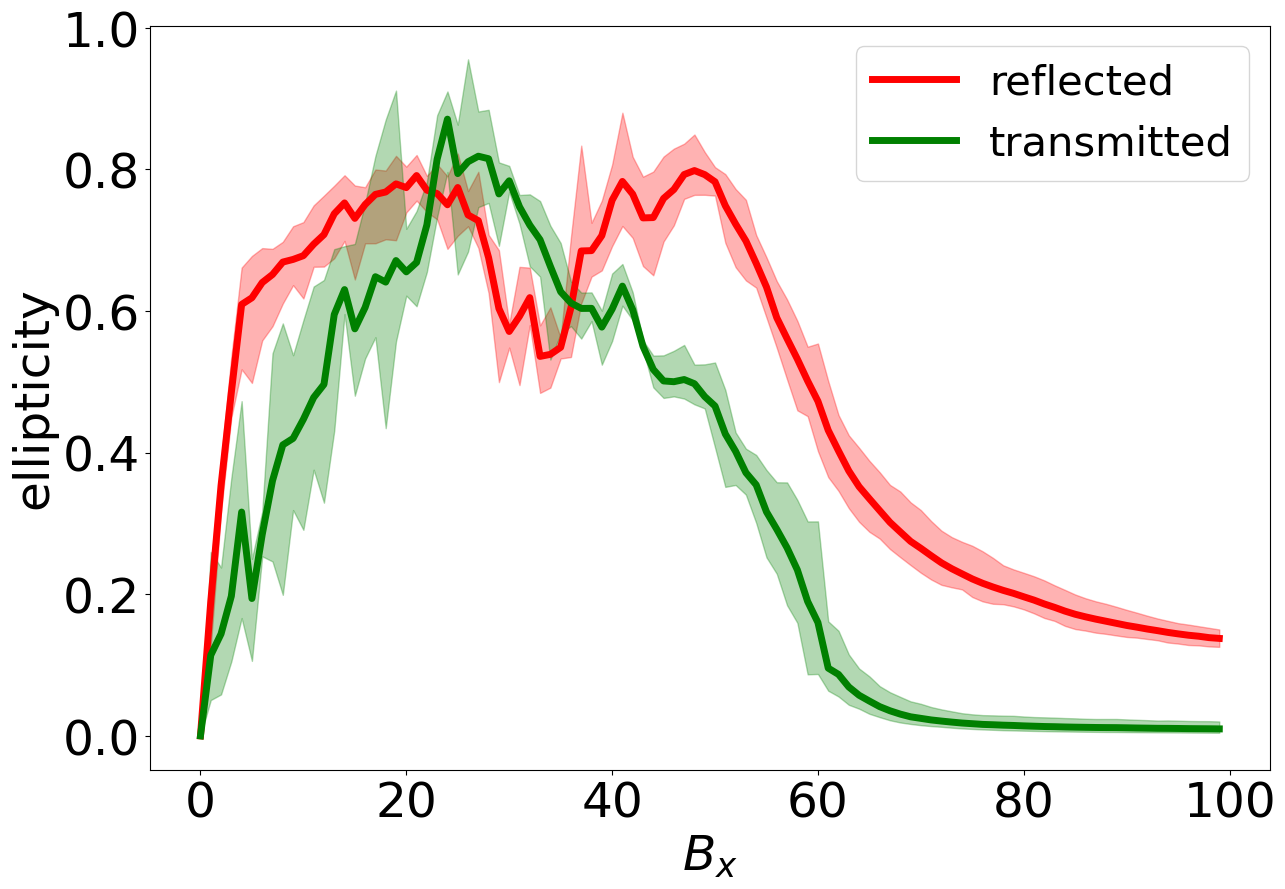

In [17]:
ares1_r = np.load("./revision_data/light_peak_reflected_1.npy")
ares1_t = np.load("./revision_data/light_peak_transmitted_1.npy")
ares2_r = np.load("./revision_data/light_mean_reflected_1.npy")
ares2_t = np.load("./revision_data/light_mean_transmitted_1.npy")
aener_r = np.load("./revision_data/energy_reflected_1.npy")
aener_t = np.load("./revision_data/energy_transmitted_1.npy")

fig, ax = plt.subplots()

fig.set_size_inches(13,9)

ax.plot(bxs, ares1_r[0,:,0,:].mean(axis=1), label='reflected', color="red", lw=5)
ax.plot(bxs, ares1_t[0,:,0,:].mean(axis=1), label='transmitted', color='green', lw=5)
amins_r = ares1_r[0,:,0,:].min(axis=1)
amaxs_r = ares1_r[0,:,0,:].max(axis=1)
amins_t = ares1_t[0,:,0,:].min(axis=1)
amaxs_t = ares1_t[0,:,0,:].max(axis=1)
plt.xlabel("$B_x$", fontsize=35)
plt.ylabel("ellipticity", fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
ax.fill_between(bxs, (amins_r), (amaxs_r), color='r', alpha=.3)
ax.fill_between(bxs, (amins_t), (amaxs_t), color='g', alpha=.3)
plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig("new_img_a.pdf", format='pdf')

In [40]:
#for i in range(len(durations)):
    #plt.plot(res1_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#    plt.plot(res2_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
    #plt.plot(res1_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
#    plt.plot(res2_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
    #plt.plot(ener_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
    #plt.plot(ener_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")

# plt.plot(res2_r[0,:,0,:].mean(axis=1), label='reflected')
# plt.plot(res2_t[0,:,0,:].mean(axis=1), label='transmitted')

# plt.legend()

In [41]:
# a0s = [85]
# densities = [30000]
# durations = [4, 8, 12, 16]

# res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()

In [42]:
# np.save("./revision_data/light_peak_reflected_2", res1_r)
# np.save("./revision_data/light_peak_transmitted_2", res1_t)
# np.save("./revision_data/light_mean_reflected_2", res2_r)
# np.save("./revision_data/light_mean_transmitted_2", res2_t)
# np.save("./revision_data/energy_reflected_2", ener_r)
# np.save("./revision_data/energy_transmitted_2", ener_t)

In [34]:
# res1_r = np.load("./revision_data/light_peak_reflected_2.npy")
# res1_t = np.load("./revision_data/light_peak_transmitted_2.npy")
# res2_r = np.load("./revision_data/light_mean_reflected_2.npy")
# res2_t = np.load("./revision_data/light_mean_transmitted_2.npy")
# ener_r = np.load("./revision_data/energy_reflected_2.npy")
# ener_t = np.load("./revision_data/energy_transmitted_2.npy")

# fig, ax = plt.subplots()

# ax.plot(bxs, res2_r[0,:,0,:].mean(axis=1), label='reflected', color="red", linestyle='dashed')
# ax.plot(bxs, res2_t[0,:,0,:].mean(axis=1), label='transmitted', color='green', linestyle='dashed')
# mins_r = res2_r[0,:,0,:].min(axis=1)
# maxs_r = res2_r[0,:,0,:].max(axis=1)
# mins_t = res2_t[0,:,0,:].min(axis=1)
# maxs_t = res2_t[0,:,0,:].max(axis=1)

# ax.fill_between(bxs, (mins_r), (maxs_r), color='r', alpha=.3)
# ax.fill_between(bxs, (mins_t), (maxs_t), color='g', alpha=.3)
# plt.legend()

In [47]:
# for i in range(len(durations)):
#     #plt.plot(res1_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#     #plt.plot(res2_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#     #plt.plot(res1_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
#     #plt.plot(res2_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
#     plt.plot(ener_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#     plt.plot(ener_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
# plt.legend()

In [18]:
a0s = [20, 30, 40, 50]

In [19]:
# densities = [500]
# durations = [4]


# res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp_fig_b.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()

In [46]:
# np.save("./revision_data/light_peak_reflected_3", res1_r)
# np.save("./revision_data/light_peak_transmitted_3", res1_t)
# np.save("./revision_data/light_mean_reflected_3", res2_r)
# np.save("./revision_data/light_mean_transmitted_3", res2_t)
# np.save("./revision_data/energy_reflected_3", ener_r)
# np.save("./revision_data/energy_transmitted_3", ener_t)

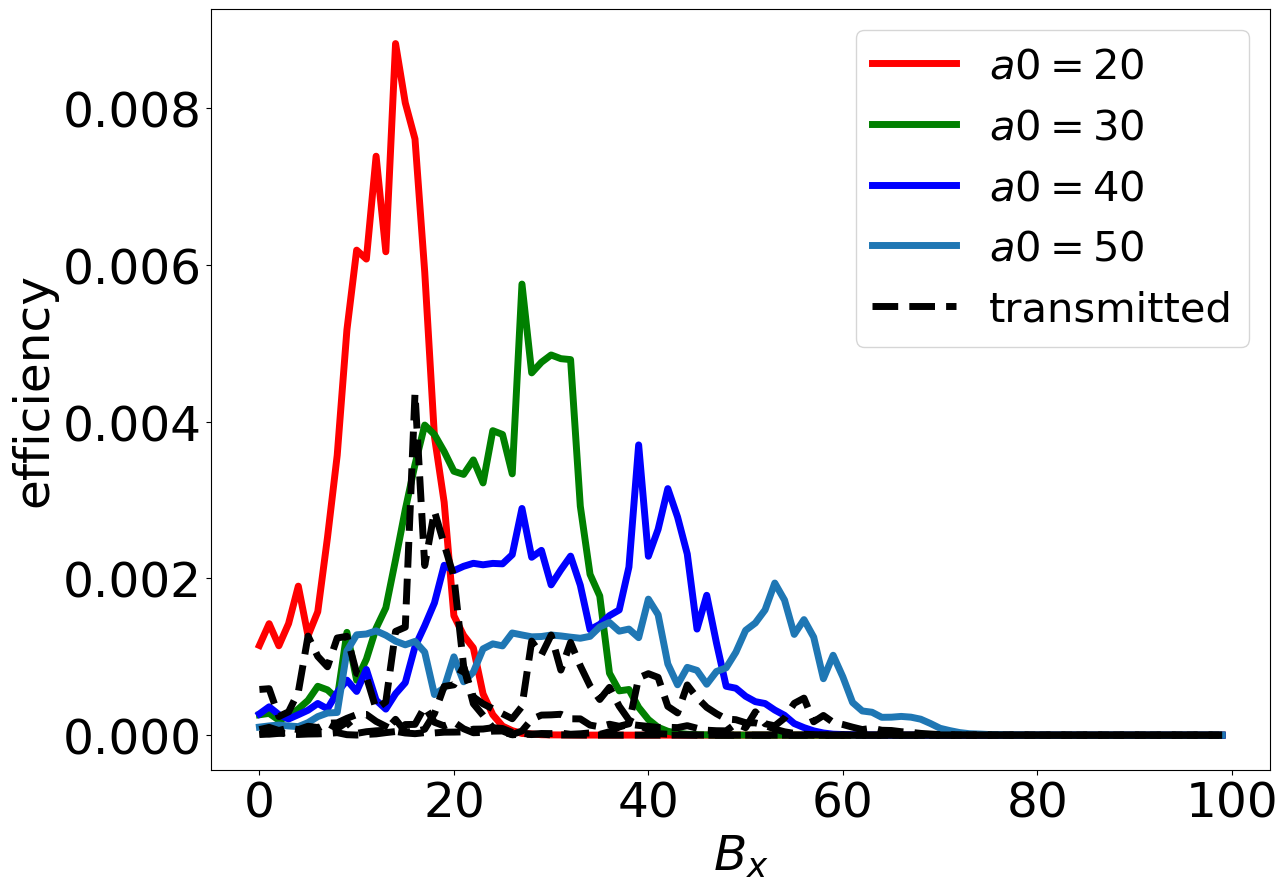

In [22]:
bres1_r = np.load("./revision_data/light_peak_reflected_3.npy")
bres1_t = np.load("./revision_data/light_peak_transmitted_3.npy")
bres2_r = np.load("./revision_data/light_mean_reflected_3.npy")
bres2_t = np.load("./revision_data/light_mean_transmitted_3.npy")
bener_r = np.load("./revision_data/energy_reflected_3.npy")
bener_t = np.load("./revision_data/energy_transmitted_3.npy")
#bener_r = np.load("./old_data/energy.npy")/16
#bener_t = np.load("./old_data/energy_transmitted_3.npy")

#ener = np.load("./energy.npy")

plt.figure(figsize=(13,9))

colors = ['r', 'g', 'b', 'C0']
for i in range(len(a0s)):
    #plt.plot(bres1_r[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, reflected")
    #plt.plot(bres2_r[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, reflected")
    #plt.plot(bres1_t[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, transmitted")
    #plt.plot(bres2_t[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, transmitted")
    #plt.plot(bener_r[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, reflected")
    plt.plot(bener_r[i,:,0,0], label='$a0 = $' + str(a0s[i]), color=colors[i], lw=5)
for i in range(len(a0s)):
    plt.plot(bener_t[i,:,0,0], color='k', linestyle='dashed', lw=5)
plt.plot([],[], linestyle='dashed', color='k', label='transmitted', lw=5)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel("efficiency", fontsize=35)
plt.xlabel("$B_x$",fontsize=35)

plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig("new_img_b.pdf", format='pdf')

In [ ]:
#np.save("res1_1", res1)
#np.save("res1_2", res1_2)

In [ ]:
#np.save("res2_1", res2)
#np.save("res2_2", res2_2)

In [ ]:
# res2_2 = np.load("res2_2.npy")
# for i in range(len(durations)):
#     #plt.plot(res1_2[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.plot(res2_2[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     #plt.plot(energy[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.legend()

In [ ]:
# #res1 = np.load("res1_1.npy")
# res2 = np.load("res2_1.npy")
# for i in range(len(durations)):
#     #plt.plot(res1[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.plot(res2[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.legend()

In [ ]:
# a0s = [20, 30, 40, 50]
# bxs = np.arange(0, 100)
# densities = [5000]
# durations = [4]

# res1_en = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_en = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# energy = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_en[i,j,k,l], res2_en[i,j,k,l], energy[i,j,k,l] = get_ells()

In [ ]:
# np.save("res1_en", res1_en)
# np.save("res2_en", res2_en)
# np.save("energy", energy)

In [ ]:
# res1_en = np.load("res1_en.npy")
# res2_en = np.load("res2_en.npy")
# energy = np.load("energy.npy")
# for i in range(len(a0s)):
#     plt.plot(energy[i,:,0,0], label="$a_0=$"+str(a0s[i]))
#     #plt.plot(res2_en[i,:,0,0])
# plt.legend()